<a href="https://colab.research.google.com/github/dragon222001/Internship_Project/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Welcome** **to** **the** **Project** **code**! 


Made by Saurabh Datta

**Project**: We are provided with a datset of various information of the users of the bank and we have to predict that how many users are more probable to take a loan from the bank as the bank wants to increase its loan takers and assets.

**Goal:** to make prediction regarding most probable customers who are likely to take loan from the bank.

For accessing the program further, first you will be required to upload the file. So, follow these steps:

1.   Go to the Git Hub Repository and download the file 'Bank_Personal_Loan_Modelling'
2.   Upload the file in the upload section given in the menu and submenu 'Files'.
3. Now, you're ready to run the code. 



**Step 1: Uploading the main libraries.**

In [2]:
#Uploading the libraries
import pandas as pd             #It is used to access and use the dataset
import numpy as np              #It is used to do array operations
import matplotlib.pyplot as plt #It is used to plot graphs and view them
import seaborn as sn            #It is used to plot heatmap graph which is used to see result accuracy in graphical manner

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step** **2: Accessing the Dataset.** 

In [3]:
#Accessing the Dataset
dataset = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data') #It assigns the values to the variable

**Step 3: Viewing basic information about the Dataset**

In [7]:
#Viewing the information regarding the columns, null values(if any), etc.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [5]:
#Viewing the information regarding the first 10 data entries just for verification.
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
#Viewing Statistical information regarding the data, ex:Mean, etc.
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Viewing the number of rows and columns for verification.
print(dataset.shape)

(5000, 14)


Hence, it is clear that our data has no null values and it consists of 5000 Rows and 14 Columns. But, one of the columns 'Experience' has faulty data i.e., it has negative value but it doesn't make any sense. So, we need to find a variable which is related to it, most probably age should be related to experience. And ID is not needed for the model as it will not effect the prediction.

**Step 4: Cleaning the Data**

Now, let us see the relation between Age and Experience.

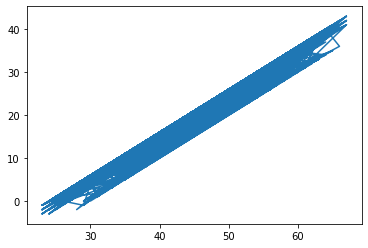

In [9]:
#Extracting Experience and Age and storing to variables
ages = dataset['Age']
experiences = dataset['Experience']

#Plotting Line graph between the two.
plt.plot(ages,experiences)
plt.show()

It is clearly visible that both are correlated. So, now let's check the degree of Correlation.

In [10]:
#Checking Correlation
correlation = experiences.corr(ages)
print(correlation)

0.9942148569683321


So, it is clearly indicated that both are highly correlated. So, we can remove the experience column as it will not make any difference until age is there. Moreover, it had faulty data. ID also needs to be dropped but let's retain it till graph plotting, afterwards, before model creation, we will  remove it as well. 

In [12]:
dataset.drop(['Experience'], axis = 1)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


**Step 5: Viewing the Graphical Representation of the Data.**

In [ ]:
#Extracting ID's of the customer and storing in a variable to use it for plotting with other fields
ids = dataset['ID']

   (i) Graphical Representation of Ages of the customers.

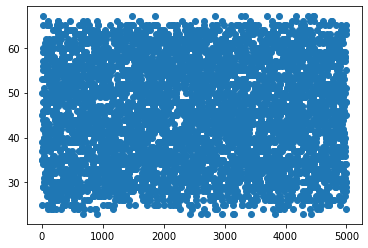

In [ ]:

#Plotting Scatter Plot
plt.scatter(ids,ages)
plt.show()

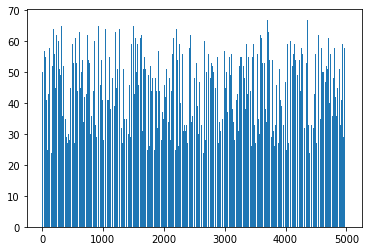

In [ ]:
#Plotting Bar Graph
plt.bar(ids,ages)
plt.show()

(ii) Graphical Representation of incomes of customers

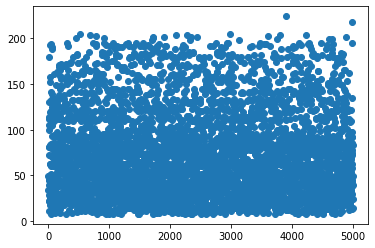

In [ ]:
#Extracting the incomes of customers and saving it to a variable.
incomes = dataset['Income']

#Plotting Scatter Plot
plt.scatter(ids, incomes)
plt.show()

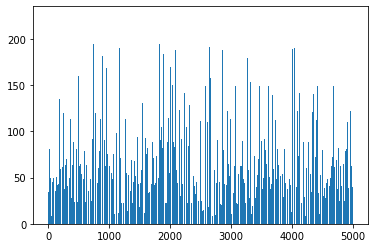

In [ ]:
#Plotting the Bar Graph
plt.bar(ids, incomes)
plt.show()

(iv) Zip codes is not much of use for the program so instead viewing Graphical Representation of Family members of customers

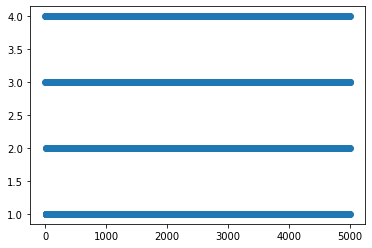

In [ ]:
#Extracting Family members and saving to a variable.
families = dataset['Family']

#Plotting Scatter Plot
plt.scatter(ids, families)
plt.show()

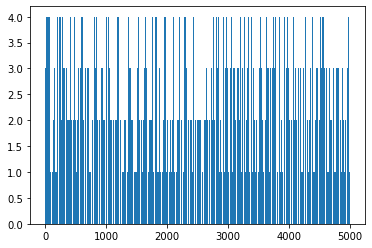

In [ ]:
#Plotting Bar Graph
plt.bar(ids, families)
plt.show() 

(v) Graphical Representation of Average spendings of customers monthly using credit card.

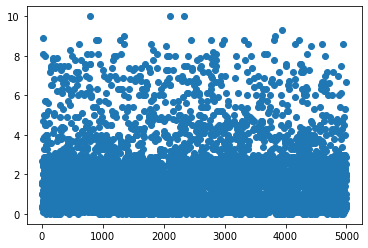

In [ ]:
#Extracting the values to a variable.
ccavgs = dataset['CCAvg']

#Plotting Scatter Plot
plt.scatter(ids, ccavgs)
plt.show()

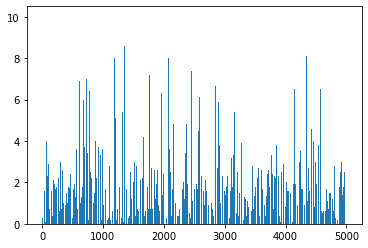

In [ ]:
#Plotting Bar Graph
plt.bar(ids, ccavgs)
plt.show()